Previously, I extracted data t.hat overlapped both temporally and (approximately) spatially the stranding data. This notebook documents a more in-depth exploration

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sb
import os
from matplotlib import rcParams

In [81]:
sb.reset_defaults()
rcParams['font.size'] = 16
rcParams['axes.formatter.limits'] = (-2,4)
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['figure.figsize'] = (10,5)
sb.set_style('darkgrid')

In [2]:
%matplotlib inline

In [3]:
dataMain = '/home/madhatter106/DATA/Beaching_Project/CapeCodData/PklJar/'

In [22]:
fp = os.path.join(dataMain, 'dfCensusCapeCodLagenorhyncus.pkl')

In [4]:
dfcens = pd.read_pickle(fp)

In [5]:
dfcens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 1 to 6899
Data columns (total 7 columns):
row_id        1056 non-null object
scientific    1056 non-null object
common        1056 non-null object
latitude      1056 non-null float64
longitude     1056 non-null float64
date_time     1056 non-null datetime64[ns]
count         1056 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 66.0+ KB


In [6]:
dfcens.head()

,row_id,scientific,common,latitude,longitude,date_time,count
1,513_10705,Lagenorhynchus acutus,Atlantic White-sided Dolphin,41.534278,-69.658585,2003-06-28 17:54:11,12.0
2,513_10174,Lagenorhynchus acutus,Atlantic White-sided Dolphin,42.791179,-69.262154,2003-06-24 17:04:46,20.0
3,513_58345,Lagenorhynchus acutus,Atlantic White-sided Dolphin,42.882440,-70.132550,2012-07-17 13:38:45,4.0
4,513_8875,Lagenorhynchus acutus,Atlantic White-sided Dolphin,42.153778,-70.053111,2003-05-15 10:27:09,50.0
5,513_78037,Lagenorhynchus acutus,Atlantic White-sided Dolphin,41.551990,-69.633260,2012-06-07 15:09:55,17.0


In [9]:
dfcens.sort_values(by='date_time', inplace=True)
dfcens.set_index('date_time', inplace=True)

In [15]:
dfcens.meta={'scientific':'Lagenorhynchus acutus',
             'common': 'Atlantic White-sided Dolphin'}
dfcens.drop(['scientific', 'common'], axis=1, inplace=True)
dfcens.to_pickle(fp)

In [20]:
dfcens.head()

,index,row_id,latitude,longitude,count
date_time,,,,,
1999-03-21 10:35:40,13,513_1555,42.5245,-69.910000,9.0
1999-03-26 11:02:25,434,513_1643,42.3685,-70.120667,4.0
1999-03-26 11:03:09,435,513_1644,42.3680,-70.091500,6.0
1999-03-26 11:48:23,679,513_1652,42.4525,-70.535667,4.0
1999-03-26 12:20:42,2447,513_82100,42.5330,-69.798667,2.0


In [21]:
dfcens.drop('index', axis=1, inplace=True)

In [24]:
fpm = fp.split('.')[0] + '_month.pkl'

In [26]:
dfmo = dfcens.resample('M').sum()

In [68]:
dfmo.to_pickle(fpm)

In [27]:
dfmo.head()

,latitude,longitude,count
date_time,,,
1999-03-31,554.017168,-908.495835,157.0
1999-04-30,418.719665,-698.096906,190.0
1999-05-31,705.392667,-1179.254834,227.0
1999-06-30,41.971000,-69.269500,45.0
1999-07-31,NaN,NaN,NaN


In [39]:
dfmo.index.month.value_counts().sort_index()

1     15
2     15
3     16
4     16
5     16
6     16
7     16
8     16
9     16
10    16
11    16
12    16
Name: date_time, dtype: int64

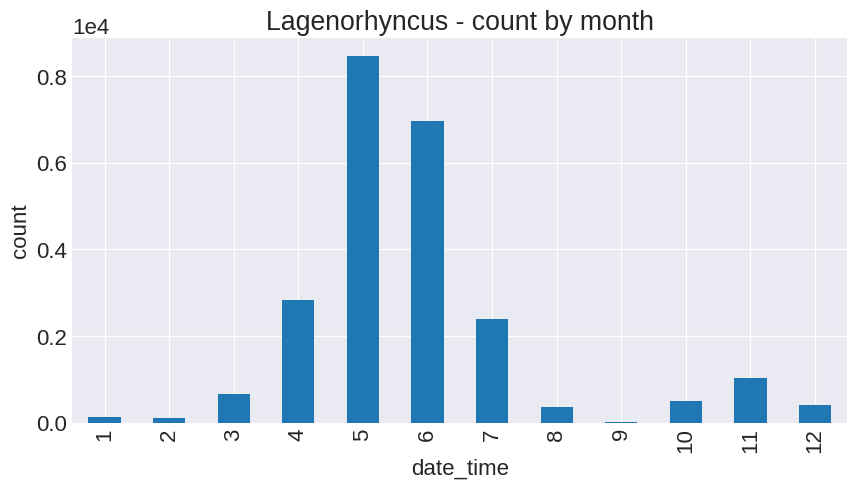

In [85]:
gp = dfmo.groupby(by=dfmo.index.month)
ax = gp['count'].sum().plot(kind='bar');
ax.set_title('Lagenorhyncus - count by month')
ax.set_ylabel('count');

In [29]:
dfy = dfmo.resample('A').sum()

In [71]:
dfy.index.year

Int64Index([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='date_time')

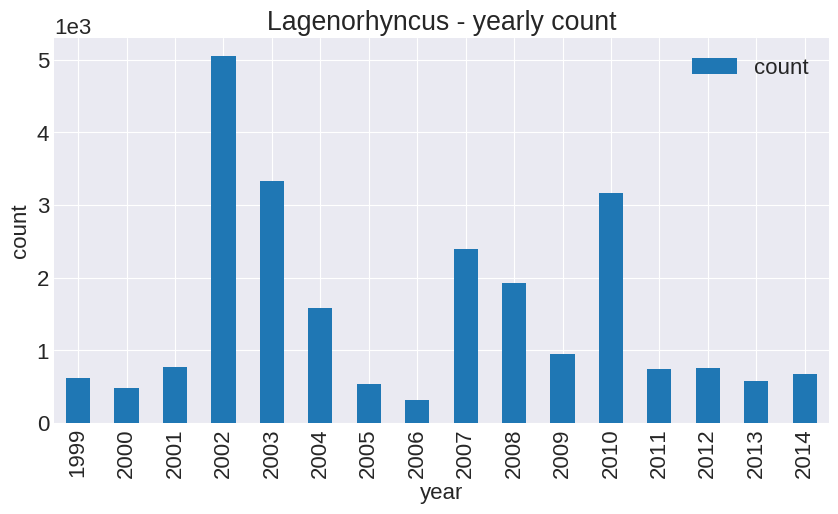

In [80]:
ax = dfy.plot(x=dfy.index.year,y='count', kind='bar');
ax.set_xlabel('year'), ax.set_ylabel('count');
ax.set_title('Lagenorhyncus - yearly count');